# 📊 Netflix EDA Project

## 1. Introduction
🔹 Introduction

Netflix has become one of the largest online streaming platforms in the world, offering thousands of movies and TV shows across different genres and languages. With its growing popularity, analyzing Netflix’s dataset provides valuable insights into content trends, audience preferences, and platform strategies.
This project aims to explore and analyze the Netflix dataset using Python. The analysis covers aspects such as the distribution of movies and TV shows, release year trends, genre preferences, duration insights, and country-wise content production. By visualizing and interpreting this data, we can better understand how Netflix has evolved over the years and what kind of content dominates the platform.

In this project, we analyze the Netflix dataset to explore:
- Content types (Movies vs TV Shows)
- Ratings distribution
- Trends over release years
- Country-wise analysis
- Duration of movies & TV shows
- Genres and other insights



## 2. Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Loading data set

In [2]:
df=pd.read_csv("netflix_titles.csv.zip")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
## Cleaning Dataset
df.isnull().sum()

# dropping missing values in important columns
df=df.dropna(subset=['type','release_year','country','duration'])

# cleaning duration column for Movies
moviedf = df[df['type']=='Movie'].copy()
moviedf['duration_int']=moviedf['duration'].str.replace('min','',regex=False).astype(int)

#cleaning duration column for TV shows
tvdf=df[df['type']=='TV show'].copy()
tvdf['duration_int']=tvdf['duration'].str.replace('Season','',regex=False).str.replace('s','',regex=False).astype(int)


### EXPLORATORY DATA ANALYSIS--- EDA

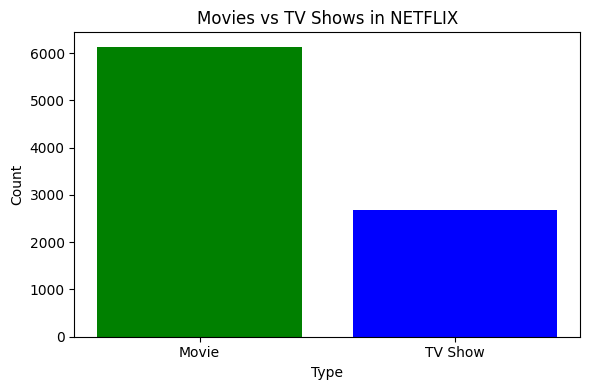

In [15]:
##  NUMBER OF MOVIES VS TV SHOW 
type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['green','blue'])
plt.title('Movies vs TV Shows in NETFLIX')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(r"C:\Users\KIIT\Desktop\VS CODE NEW\netflix data analysis images\shows_movies_count.png")
plt.show()


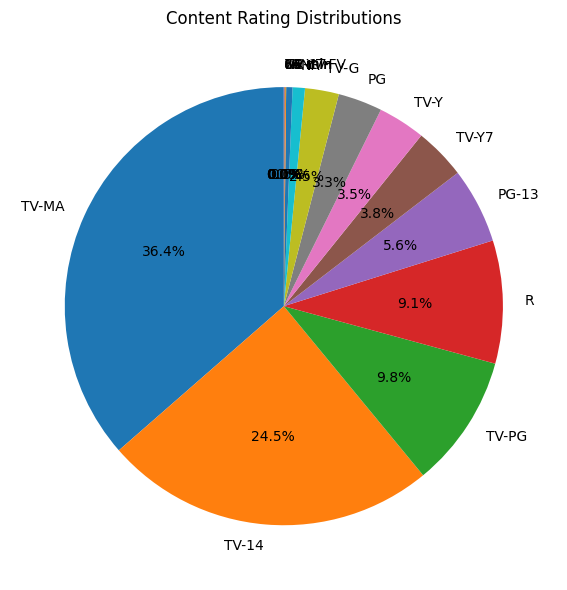

In [16]:
## Ratings Distribution
ratings_count=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(ratings_count,labels=ratings_count.index, autopct='%1.1f%%',startangle=90)
plt.title('Content Rating Distributions')
plt.tight_layout()
plt.savefig(r"C:\Users\KIIT\Desktop\VS CODE NEW\netflix data analysis images\content_rating.png")
plt.show()

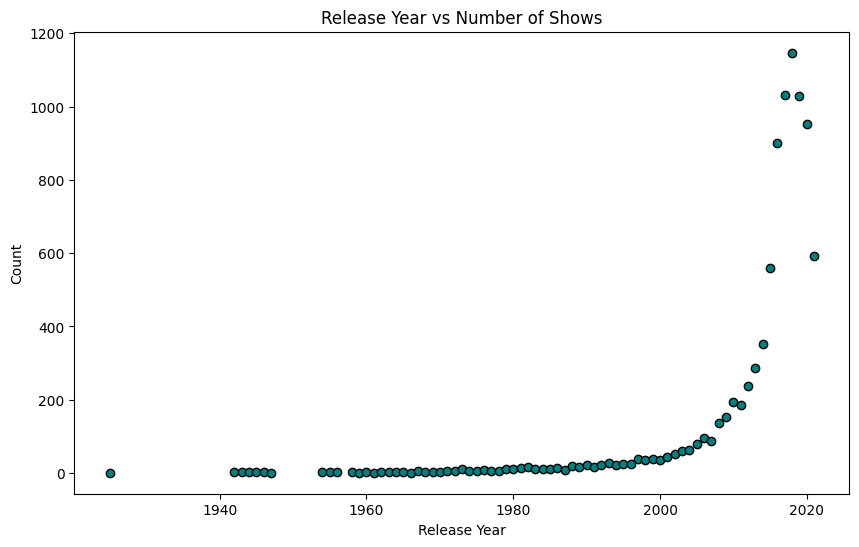

In [17]:
##Release Year vs Number of Shows
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='teal', edgecolor='black')
plt.title('Release Year vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.savefig(r"C:\Users\KIIT\Desktop\VS CODE NEW\netflix data analysis images\year_no_of_shows.png")
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_25436\2676557361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.values, y=country_count.index, palette="viridis")


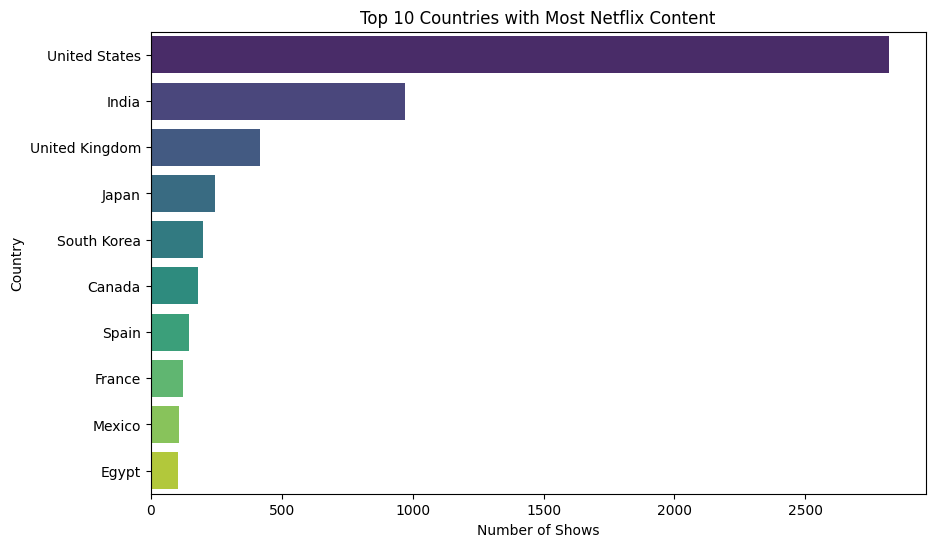

In [18]:
## Country Analysis
country_count = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_count.values, y=country_count.index, palette="viridis")
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.savefig(r"C:\Users\KIIT\Desktop\VS CODE NEW\netflix data analysis images\top_10_countries.png")
plt.show()


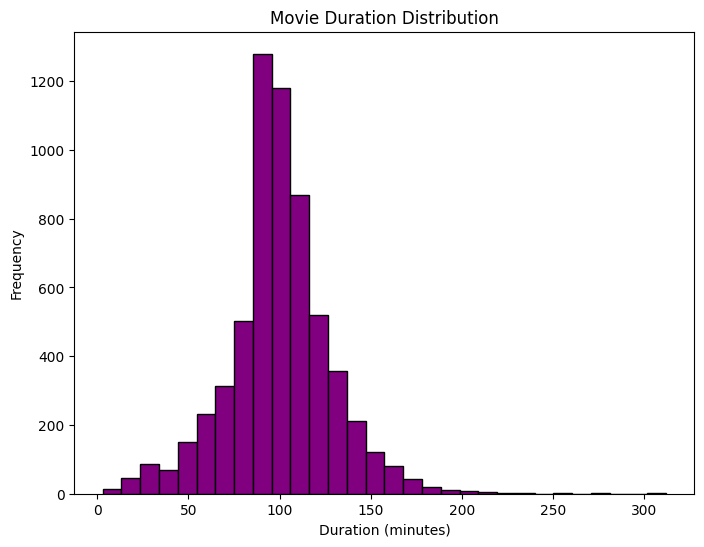

In [ ]:
## Duration Analaysis
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded
moviedf = df[df['type'] == 'Movie'].copy()

# Clean duration column ONCE
moviedf['duration_int'] = (
    moviedf['duration']
    .str.replace('min','', regex=False)   # remove 'min'
    .str.strip()                          # remove spaces
    .astype(float)                        # convert to numeric
)

# Drop missing values just in case
moviedf = moviedf.dropna(subset=['duration_int'])

# Now you can reuse moviedf safely in any plot
plt.figure(figsize=(8,6))
plt.hist(moviedf['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.savefig(r"C:\Users\KIIT\Desktop\VS CODE NEW\netflix data analysis images\movie_duration.png")
plt.show()



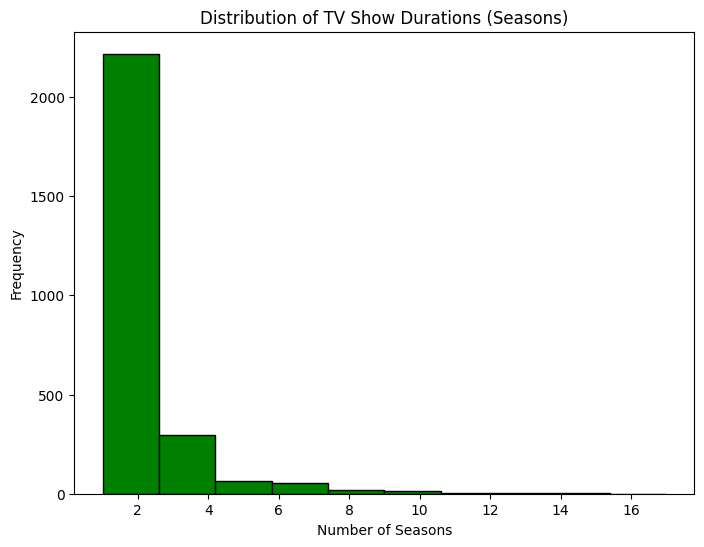

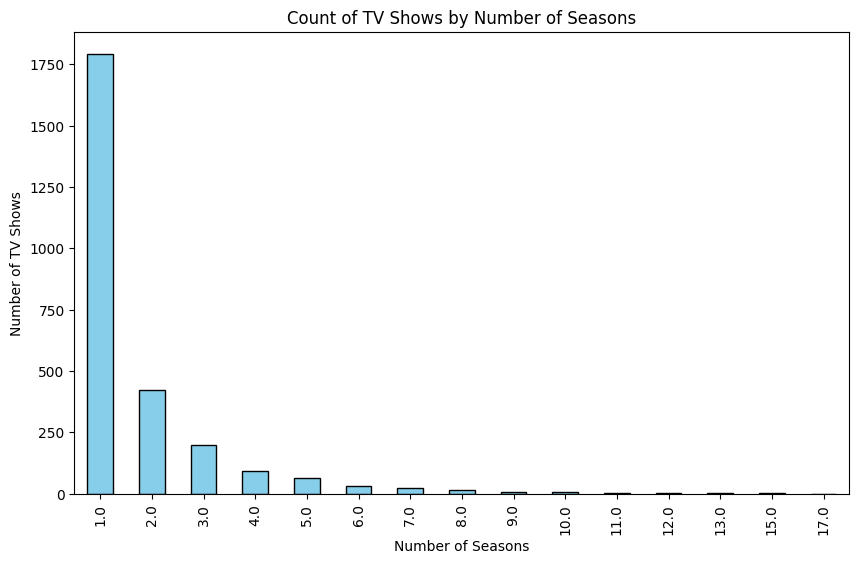

In [19]:
## Show Duration Distribution
showdf  = df[df['type'] == 'TV Show'].copy()
showdf['duration_int'] = (
    showdf['duration']
    .str.replace('Season','', regex=False)
    .str.replace('s','', regex=False)
    .str.strip()
    .astype(float)
)
plt.figure(figsize=(8,6))
plt.hist(showdf['duration_int'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of TV Show Durations (Seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.savefig(r"C:\Users\KIIT\Desktop\VS CODE NEW\netflix data analysis images\show_frequency.png")
plt.show()

plt.figure(figsize=(10,6))
showdf['duration_int'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.savefig(r"C:\Users\KIIT\Desktop\VS CODE NEW\netflix data analysis images\shows_vs_seasons.png")
plt.show()



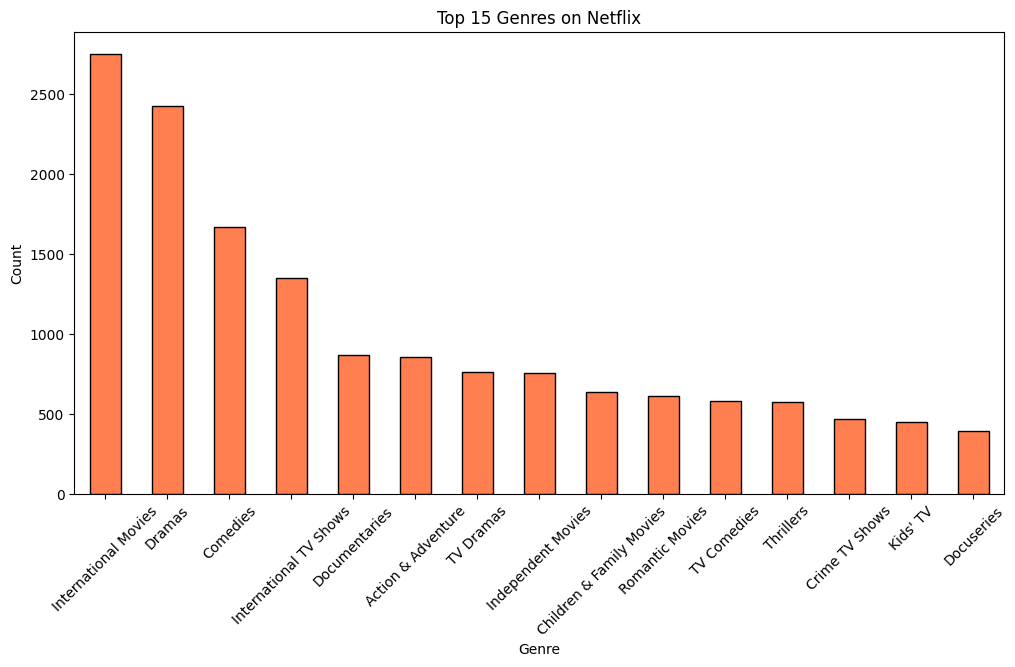

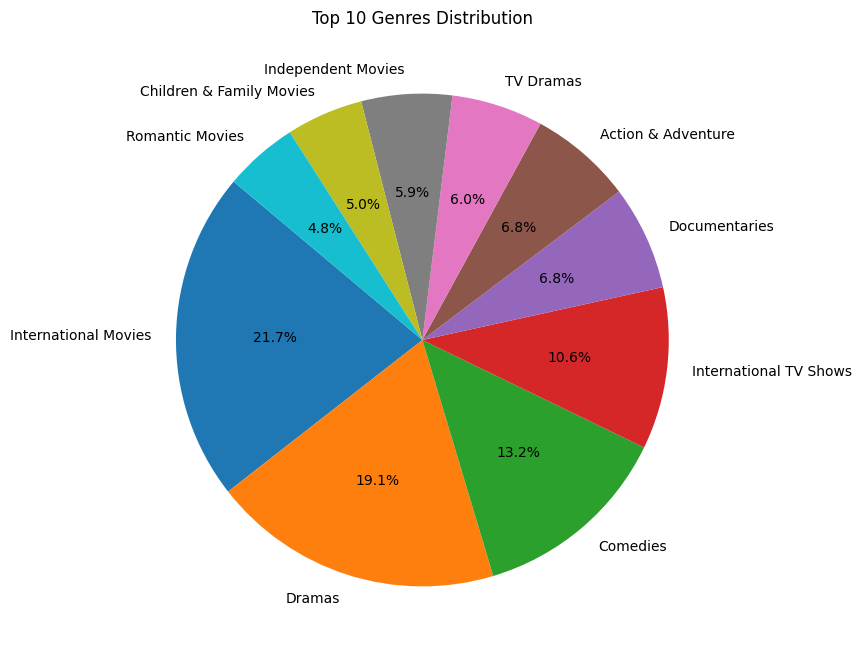

In [20]:
## Genre Analysis
genre_df = df['listed_in'].str.split(',').explode().str.strip()

# Count genres
genre_counts = genre_df.value_counts()

# 📊 Bar plot - Top 15 genres
plt.figure(figsize=(12,6))
genre_counts.head(15).plot(kind='bar', color='coral', edgecolor='black')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\KIIT\Desktop\VS CODE NEW\netflix data analysis images\top_15_genres.png")
plt.show()

# 📈 Pie chart - Top 10 genres share
plt.figure(figsize=(8,8))
genre_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Top 10 Genres Distribution')
plt.ylabel('')
plt.savefig(r"C:\Users\KIIT\Desktop\VS CODE NEW\netflix data analysis images\top_10_genres.png")
plt.show()

### Conclusion

From the analysis, we observed several interesting patterns in Netflix’s content library. Movies dominate the platform compared to TV shows, with most content being produced in recent years as Netflix expanded globally. The United States contributes the largest share of content, but international productions are steadily increasing. Popular genres like Drama and Comedy remain dominant, while show durations and movie lengths exhibit clear trends over time.

Overall, this project highlights how data analysis can uncover meaningful insights from large entertainment datasets. Such findings not only help us understand Netflix’s strategy but also reflect broader changes in the streaming industry. This project can be extended further by applying machine learning techniques for content recommendation or predictive analytics on user preferences.